#### Modeling The System

The folowing is a program that models a system with N molecules.

We start defining the random energy generator:

In [1]:
from random import random
from math import log

def random_energy(k, T):
    return -k*T*log(random())

Here we run the simulation:

In [2]:
tmax = 200
characteristic_time = 1
activation_energy = 1e-20
k = 1.38e-23
T = 229
N = 1000

# List indicating the status of the molecule i. True is active, false is inactive. 
# We start defining the status of all molecules as false 

status = [False] * N

# this is to keep record of all molecules that reacted at time t
# it helps us when building the graph
n_time = [0] * int(tmax / characteristic_time)


for t in range(len(n_time)):
    for i in range(0, N):
        # check if the molecule is already active
        if status[i] == True:
            # case yes we ignore it
            continue
        # get a random energy
        e = random_energy(k, T)
        # check if the energy is > than the activation energy
        if e > activation_energy:
            # We set the new status
            status[i] = True
            n_time[t] = n_time[t] + 1
    

After the simulation is finished we have the array `n_time`, that is the number of molecules reacted at time $i$. We down define the function on N. If everything went right both N(t) and the expected results will be very close.

In [3]:
def u(tau, k, t0, ea):
    return 1 / tau * pow(e, -ea / (k*t0))

def n(t, tau, n0, k, t0, ea):
    return n0 * pow(e, -u(tau, k, t0, ea))

Down we plot the number of inactive molecules with respect to time.

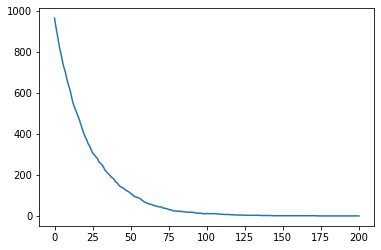

In [5]:
import itertools
import numpy as np


ys = N - np.cumsum(np.array(n_time))
xs = np.linspace(0, tmax, len(ys))

import matplotlib.pyplot as plt

# plot the simulation data
plt.plot(xs, ys)

# get the expected data from the formula
# !! we here have a problemof overflow
#ys = [n(t, characteristic_time, N, k, T, activation_energy) for t in xs]

# plot expected data
# plt.plot(xs, ys)